In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer



In [2]:
df = pd.read_csv('clinicalData.csv')
data = df.copy()

In [3]:
# for col in data.columns:
#     if data[col].dtype == 'object':  
#         print(f"\nColumn Name: {col}")
#         print(data[col].value_counts())

In [4]:
# legend = {}
# for col in data.columns:
#     if data[col].dtype == 'object':  # if the column is categorical
#         unique_values = data[col].unique()
#         legend[col] = {value: i for i, value in enumerate(unique_values)}

# # Print the legend
# for original_column, mapping in legend.items():
#     print(f"{original_column} - Legend:")
#     for original_value in mapping.items():
#         print(f"  {original_value}")

In [5]:
# value_counts = data['surgery_type'].value_counts()
# print(value_counts)

In [6]:
# value_counts = df['family_history'].value_counts()
# print(value_counts)

In [7]:
# preTrt_columns = [col for col in data.columns if col.endswith('_preTrt')]
# preTrt_columns1 = [col for col in data.columns if col.startswith('preTrt')]
# postTrt_columns = [col for col in data.columns if 'postTrt' in col]
# print(postTrt_columns)
# print(preTrt_columns1)
# print(preTrt_columns)

In [8]:
# data['RFS'].value_counts()

In [9]:
#create a new columns
# data['surgery_type'] = data['surgery_type'].replace('breast_preserving', 'masectomy')
# data['preTrt_lymph_node_status'] = data['preTrt_lymph_node_status'].replace('breast_preserving', 'masectomy')



In [10]:
# #dropping columns
# data.drop(['dbUniquePatientID', 'study_ID', 'patient_ID', 'GEO_GSMID', 'platform_ID', 'GEO_platform_ID', 'AE_platform_ID', 'original_study_patient_ID', 'site_ID', 'site_ID_preprocessed', 'treatment_protocol_number', 'clinical_AJCC_stage', 'age_bin_description', 'age_bin', 'nationality', 'tumor_size_cm_preTrt_preSurgeryMin', 'treatment_protocol_number', 'chemotherapyClass', 'relapseOneYearVsThreePlus', 'PTEN_mutation', 'PTEN_pos', 'p53_mutation', 'clinical_AJCC_stageRangeMin', 'clinical_AJCC_stageRangeMax', 'tumor_stage_preTrtMin', 'tumor_stage_preTrtMax', 'hist_gradeMax', 'hist_gradeMin', 'path_diagnosis', 'path', 'chemosensitivity_prediction', 'months_from_surgery_measured_RCB', 'RFS_months_or_MIN_months_of_RFS', 'DFS_months_or_MIN_months_of_DFS', 'OS_months_or_MIN_months_of_OS', 'OS_up_until_death', 'relapseOneYearVsFivePlus',  'p53', 'DNA_index', 'study_specific_protocol_number', 'biopsy_postTrt_days', 'immediate_biol_target', 'preTrt_numPosLymphNodesRemoved', 'postTrt_totalLymphNodes', 'notthingham_prognostic_index', 'months_until_first_event_or_last_checkup', 'ER_percentage_preTrt', 'ER_expr_preTrt','PR_expr_preTrt', 'HER2_expr_preTrt', 'HER2_SNP6_state', 'p53_mutation_type', 'PIK3CA_mutation', 'family_history', 'relapse_beforeYR1', 'metastasis_stage_preTrt'], axis=1, inplace=True)

# data.columns

In [11]:
# dfN = pd.read_csv('clinicalVarDef.csv')

In [12]:
# start = 42
# end = 43 

# rows_to_delete = list(range(start, end + 1))
# rows_to_delete = [106] 


# dfN = dfN.drop(dfN.index[rows_to_delete])

# dfN = dfN.reset_index(drop=True)

# dfN.head(15)

In [13]:
# dfN.to_csv('legend.csv', index=False)

In [14]:
#dropping columns
data.drop(['dbUniquePatientID', 'study_ID', 'patient_ID', 'GEO_GSMID', 'platform_ID', 'GEO_platform_ID', 'AE_platform_ID', 'original_study_patient_ID', 'site_ID', 'site_ID_preprocessed', 'treatment_protocol_number', 'age_bin_description', 'age_bin', 'nationality', 'tumor_size_cm_preTrt_preSurgeryMin', 'treatment_protocol_number', 'chemotherapyClass', 'relapseOneYearVsThreePlus', 'PTEN_mutation', 'PTEN_pos', 'p53_mutation', 'clinical_AJCC_stageRangeMin', 'clinical_AJCC_stageRangeMax', 'tumor_stage_preTrtMin', 'tumor_stage_preTrtMax', 'hist_gradeMax', 'hist_gradeMin', 'path_diagnosis', 'path', 'chemosensitivity_prediction', 'months_from_surgery_measured_RCB', 'RFS_months_or_MIN_months_of_RFS', 'DFS_months_or_MIN_months_of_DFS', 'OS_months_or_MIN_months_of_OS', 'OS_up_until_death', 'relapseOneYearVsFivePlus', 'p53', 'DNA_index', 'study_specific_protocol_number', 'biopsy_postTrt_days', 'immediate_biol_target', 'preTrt_numPosLymphNodesRemoved', 'postTrt_totalLymphNodes', 'notthingham_prognostic_index', 'months_until_first_event_or_last_checkup', 'ER_percentage_preTrt', 'ER_expr_preTrt','PR_expr_preTrt', 'HER2_expr_preTrt', 'HER2_SNP6_state', 'p53_mutation_type', 'PIK3CA_mutation', 'family_history', 'relapse_beforeYR1', 'metastasis_stage_preTrt', 'taxaneGeneral', 'dead', 'hormone_therapyClass'], axis=1, inplace=True)

data.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,clinical_AJCC_stage,preTrt_lymph_node_status,postTrt_lymph_node_status,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,...,trastuzumab,letrozole,chemotherapy,hormone_therapy,no_treatment,methotrexate,cetuximab,carboplatin,other,neoadjuvant_or_adjuvant
0,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo
1,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo
2,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo


In [15]:
#renaming columns
data = data.rename(columns={'other': 'other_treatment'})
data = data.rename(columns={'radiotherapyClass': 'radiotherapy'})
data = data.rename(columns={'surgery_type': 'surgery'})


# data = data.rename(columns={'surgery_type': 'Decision 1 surgery'})
# data = data.rename(columns={'chemotherapy': 'Decision 2 chemotherapy'})

In [16]:
df2 = pd.read_csv('columns_with_duplicates.csv')
result = df2.iloc[:, -1].to_frame()

result.head(5)

result_reset = result.reset_index(drop=True)

In [17]:
df1 = pd.read_csv('synthetic_data.csv')
df1_reset = df1.reset_index(drop=True)
concat = pd.concat([data, result_reset, df1_reset])
concat.to_csv('combined.csv', index=False)
concat.reset_index(drop=True, inplace=True)

concat.drop(['Data Source'], axis=1, inplace=True)

data = concat.copy() 


In [18]:
concat.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'clinical_AJCC_stage', 'preTrt_lymph_node_status',
       'postTrt_lymph_node_status', 'preTrt_totalLymphNodes',
       'preTrt_numPosLymphNodes', 'postTrt_numPosLymphNodes',
       'preTrt_posDichLymphNodes', 'tumor_stage_preTrt', 'tumor_stage_postTrt',
       'pam50', 'hist_grade', 'nuclear_grade_preTrt', 'pCR', 'near_pCR',
       'pCR_spectrum', 'RCB', 'RFS', 'DFS', 'OS', 'metastasis',
       'metastasis_months', 'died_from_cancer_if_dead', 'age', 'race',
       'menopausal_status', 'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt',
       'ERbb2_preTrt', 'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt',
       'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt',
       'HER2_IHC_score_preTrt', 'HER2_fish_cont_score_preTrt',
       'cytokeratin5_pos', 'ploidy', 'top2atri_preTrt', 'topoihc_preTrt',
       'S

In [19]:
concat['metastasis_months_3'].value_counts()

metastasis_months_3
16.0    1648
14.0    1461
17.0    1408
15.0    1245
18.0    1004
13.0     394
19.0     278
20.0     246
10.0     190
21.0     189
12.0     147
11.0     104
22.0      37
23.0      34
24.0      32
25.0      28
6.0        1
2.0        1
9.0        1
27.0       1
1.0        1
35.0       1
Name: count, dtype: int64

In [20]:
# print("Min:", data['metastasis_stage_preTrt'].min())
# print("Max:", data['metastasis_stage_preTrt'].max())

In [21]:
#replacing nan values

# numerical and categorical columns
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

#  one-hot encoded columns
one_hot_cols = [col for col in num_cols if set(data[col].unique()).issubset({0, 1})]

# Exclude one-hot encoded columns
num_cols = list(set(num_cols) - set(one_hot_cols))

# Create transformers for numerical and categorical columns
num_transformer = KNNImputer(n_neighbors=5)
cat_transformer = SimpleImputer(strategy='most_frequent')

# Apply transformations to the numerical and categorical columns
num_data_imputed = num_transformer.fit_transform(data[num_cols])
cat_data_imputed = cat_transformer.fit_transform(data[cat_cols])

# Convert back to df
num_data_imputed = pd.DataFrame(num_data_imputed, columns=num_cols)
cat_data_imputed = pd.DataFrame(cat_data_imputed, columns=cat_cols)

# Concat df
data_imputed = pd.concat([num_data_imputed, cat_data_imputed, data[one_hot_cols]], axis=1)

# to maintain the original order
data_imputed = data_imputed.reindex(columns=data.columns)

# Round to the nearest int
data_imputed[num_cols] = data_imputed[num_cols].round()

In [22]:
for column, dtype in data_imputed.dtypes.items():
    print(f"'{column}', Dtype: {dtype}")


'biopsy_preTreat', Dtype: float64
'pCR_postTrt_days', Dtype: float64
'tumor_size_cm_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_secondAxis_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_postTrt', Dtype: float64
'clinical_AJCC_stage', Dtype: object
'preTrt_lymph_node_status', Dtype: object
'postTrt_lymph_node_status', Dtype: object
'preTrt_totalLymphNodes', Dtype: float64
'preTrt_numPosLymphNodes', Dtype: float64
'postTrt_numPosLymphNodes', Dtype: float64
'preTrt_posDichLymphNodes', Dtype: float64
'tumor_stage_preTrt', Dtype: object
'tumor_stage_postTrt', Dtype: object
'pam50', Dtype: object
'hist_grade', Dtype: float64
'nuclear_grade_preTrt', Dtype: float64
'pCR', Dtype: float64
'near_pCR', Dtype: float64
'pCR_spectrum', Dtype: object
'RCB', Dtype: object
'RFS', Dtype: float64
'DFS', Dtype: float64
'OS', Dtype: float64
'metastasis', Dtype: float64
'metastasis_months', Dtype: float64
'died_from_cancer_if_dead', Dtype: float64
'age', Dtype: float64
'race', Dtype: object
'menopau

In [23]:

# # Loop through the columns
for col in data_imputed.columns:
    print(f"Column: {col}")
    
    # Check if the column is numerical
    if data_imputed[col].dtype in ['int64', 'float64']:
        print("Min:", data_imputed[col].min())
        print("Max:", data_imputed[col].max())

Column: biopsy_preTreat
Min: 1.0
Max: 1.0
Column: pCR_postTrt_days
Min: 84.0
Max: 84.0
Column: tumor_size_cm_preTrt_preSurgery
Min: 0.0
Max: 25.0
Column: tumor_size_cm_secondAxis_preTrt_preSurgery
Min: 3.0
Max: 8.0
Column: tumor_size_cm_postTrt
Min: 0.0
Max: 4.0
Column: clinical_AJCC_stage
Column: preTrt_lymph_node_status
Column: postTrt_lymph_node_status
Column: preTrt_totalLymphNodes
Min: 0.0
Max: 40.0
Column: preTrt_numPosLymphNodes
Min: 0.0
Max: 33.0
Column: postTrt_numPosLymphNodes
Min: 0.0
Max: 17.0
Column: preTrt_posDichLymphNodes
Min: 0.0
Max: 1.0
Column: tumor_stage_preTrt
Column: tumor_stage_postTrt
Column: pam50
Column: hist_grade
Min: 1.0
Max: 3.0
Column: nuclear_grade_preTrt
Min: 1.0
Max: 3.0
Column: pCR
Min: 0.0
Max: 1.0
Column: near_pCR
Min: 0.0
Max: 1.0
Column: pCR_spectrum
Column: RCB
Column: RFS
Min: 0.0
Max: 1.0
Column: DFS
Min: 0.0
Max: 1.0
Column: OS
Min: 0.0
Max: 1.0
Column: metastasis
Min: 0.0
Max: 1.0
Column: metastasis_months
Min: 1.0
Max: 35.0
Column: died_fro

In [24]:
# columns to convert
columns_to_convert = ['pCR_postTrt_days', 'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes', 'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade', 'nuclear_grade_preTrt', 'pCR', 'near_pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months','died_from_cancer_if_dead', 'age', 'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt', 'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt', 'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt', 'HER2_fish_cont_score_preTrt',  'cytokeratin5_pos', 'top2atri_preTrt', 'topoihc_preTrt', 'S_phase', 'intarvenous', 'intramuscular', 'oral', 'postmenopausal_only', 'anthracycline', 'taxane', 'anti_estrogen', 'aromatase_inhibitor', 'estrogen_receptor_blocker', 'estrogen_receptor_blocker_and_stops_production', 'estrogen_receptor_blocker_and_eliminator', 'anti_HER2', 'tamoxifen', 'doxorubicin', 'epirubicin', 'docetaxel', 'capecitabine', 'fluorouracil', 'paclitaxel', 'cyclophosphamide', 'anastrozole', 'fulvestrant', 'gefitinib', 
'trastuzumab', 'letrozole', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'methotrexate', 'cetuximab', 'carboplatin','other_treatment']

# Convert columns
for column in columns_to_convert:
    data_imputed[column] = data_imputed[column].round().astype(int)

In [25]:
value_counts = data_imputed['menopausal_status'].value_counts()
print(value_counts)

menopausal_status
post    26799
pre       139
Name: count, dtype: int64


In [26]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26938 entries, 0 to 26937
Data columns (total 94 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   biopsy_preTreat                                 26938 non-null  float64
 1   pCR_postTrt_days                                26938 non-null  int64  
 2   tumor_size_cm_preTrt_preSurgery                 26938 non-null  float64
 3   tumor_size_cm_secondAxis_preTrt_preSurgery      26938 non-null  float64
 4   tumor_size_cm_postTrt                           26938 non-null  float64
 5   clinical_AJCC_stage                             26938 non-null  object 
 6   preTrt_lymph_node_status                        26938 non-null  object 
 7   postTrt_lymph_node_status                       26938 non-null  object 
 8   preTrt_totalLymphNodes                          26938 non-null  int64  
 9   preTrt_numPosLymphNodes                

In [27]:


# Encoding values
encoded_data = pd.get_dummies(data_imputed)

#boolean columns to integer type
bool_columns = encoded_data.select_dtypes(include=['bool']).columns
encoded_data[bool_columns] = encoded_data[bool_columns].astype(int)

# Print the legend
legend = {}
for col in data_imputed.columns:
    if data_imputed[col].dtype == 'object':  
        unique_values = data_imputed[col].unique()
        legend[col] = {value: i for i, value in enumerate(unique_values)}

for original_column, mapping in legend.items():
    print(f"{original_column} - Legend:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} : {encoded_value}")


clinical_AJCC_stage - Legend:
  IIIA : 0
  IIB : 1
  IIIB : 2
  IIA : 3
  I : 4
  IIIC : 5
  II : 6
  III : 7
  IV : 8
preTrt_lymph_node_status - Legend:
  positive : 0
  N0 : 1
  N1 : 2
  ND : 3
  N2 : 4
  N3 : 5
postTrt_lymph_node_status - Legend:
  N0 : 0
  N1a : 1
  N3 : 2
  N2a : 3
  N2 : 4
  N1 : 5
  positive : 6
tumor_stage_preTrt - Legend:
  T3 : 0
  T2 : 1
  T4 : 2
  T1 : 3
  T0 : 4
tumor_stage_postTrt - Legend:
  T1c : 0
  T0 : 1
  T1b : 2
  T1 : 3
  T2 : 4
  T1a : 5
  T1mic : 6
  Tis : 7
pam50 - Legend:
  Basal : 0
  Luminal B : 1
  Luminal A : 2
  Her2 : 3
  Normal : 4
  Claudin : 5
pCR_spectrum - Legend:
  PR : 0
  PD : 1
  SD : 2
  CR : 3
  NCR : 4
  EPD : 5
  NE : 6
RCB - Legend:
  II : 0
  2 : 1
  3 : 2
  0 : 3
  1 : 4
  III : 5
  0/I : 6
race - Legend:
  white : 0
  asian : 1
  mixed : 2
  black : 3
  hispanic : 4
menopausal_status - Legend:
  post : 0
  pre : 1
HER2_IHC_score_preTrt - Legend:
  NEG : 0
  1 : 1
  0 : 2
  3 : 3
  2 : 4
  ND : 5
ploidy - Legend:
  aneupl

In [28]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26938 entries, 0 to 26937
Columns: 157 entries, biopsy_preTreat to neoadjuvant_or_adjuvant_unspecified
dtypes: float64(17), int64(140)
memory usage: 32.3 MB


In [29]:
for column, dtype in encoded_data.dtypes.items():
    print(f"'{column}', Dtype: {dtype}")

'biopsy_preTreat', Dtype: float64
'pCR_postTrt_days', Dtype: int64
'tumor_size_cm_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_secondAxis_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_postTrt', Dtype: float64
'preTrt_totalLymphNodes', Dtype: int64
'preTrt_numPosLymphNodes', Dtype: int64
'postTrt_numPosLymphNodes', Dtype: int64
'preTrt_posDichLymphNodes', Dtype: int64
'hist_grade', Dtype: int64
'nuclear_grade_preTrt', Dtype: int64
'pCR', Dtype: int64
'near_pCR', Dtype: int64
'RFS', Dtype: int64
'DFS', Dtype: int64
'OS', Dtype: int64
'metastasis', Dtype: int64
'metastasis_months', Dtype: int64
'died_from_cancer_if_dead', Dtype: int64
'age', Dtype: int64
'ER_preTrt', Dtype: int64
'ER_fmolmg_preTrt', Dtype: int64
'ESR1_preTrt', Dtype: int64
'ERbb2_preTrt', Dtype: int64
'Erbeta_preTrt', Dtype: int64
'ERBB2_CPN_amplified', Dtype: int64
'PR_preTrt', Dtype: int64
'PR_percentage_preTrt', Dtype: int64
'PR_fmolmg_preTrt', Dtype: int64
'HER2_preTrt', Dtype: int64
'HER2_fish_cont_score_pre

In [30]:
value_counts = encoded_data['neoadjuvant_or_adjuvant_mixed'].value_counts()
print(value_counts)

neoadjuvant_or_adjuvant_mixed
0    26752
1      186
Name: count, dtype: int64


In [31]:
# #encoding values
# encoded_data = pd.get_dummies(data_imputed)

# legend = {}
# for col in data_imputed.columns:
#     if data_imputed[col].dtype == 'object':  # if the column is categorical
#         unique_values = data_imputed[col].unique()
#         legend[col] = {value: i for i, value in enumerate(unique_values)}

# # Print the legend
# for original_column, mapping in legend.items():
#     print(f"{original_column} - Legend:")
#     for original_value, encoded_value in mapping.items():
#         print(f"  {original_value} : {encoded_value}")

In [32]:
value_counts = encoded_data['menopausal_status_pre'].value_counts()
print(value_counts)

menopausal_status_pre
0    26799
1      139
Name: count, dtype: int64


In [33]:


# value_counts = data_imputed['preTrt_lymph_node_status_N0'].value_counts()
# print(value_counts)

In [34]:
encoded_data.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,HER2_IHC_score_preTrt_NEG,ploidy_aneuploid,ploidy_diploid,ploidy_multiploid,surgery_breast preserving,surgery_mastectomy,neoadjuvant_or_adjuvant_adj,neoadjuvant_or_adjuvant_mixed,neoadjuvant_or_adjuvant_neo,neoadjuvant_or_adjuvant_unspecified
0,1.0,84,3.0,6.0,0.0,12,3,1,1,3,...,1,1,0,0,1,0,0,0,1,0
1,1.0,84,3.0,6.0,0.0,15,0,7,1,3,...,1,1,0,0,1,0,0,0,1,0
2,1.0,84,3.0,6.0,1.0,17,2,10,1,2,...,1,1,0,0,1,0,0,0,1,0


In [35]:
# # Get a list of float columns
# float_cols = data.select_dtypes(include=['float64']).columns.tolist()
# print('Float columns:', float_cols)

# # Get a list of int columns
# int_cols = data.select_dtypes(include=['int64']).columns.tolist()
# print('Int columns:', int_cols)

In [36]:
encoded_data.to_csv('processed_data.csv', index=False)

In [37]:
encoded_data.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       ...
       'HER2_IHC_score_preTrt_NEG', 'ploidy_aneuploid', 'ploidy_diploid',
       'ploidy_multiploid', 'surgery_breast preserving', 'surgery_mastectomy',
       'neoadjuvant_or_adjuvant_adj', 'neoadjuvant_or_adjuvant_mixed',
       'neoadjuvant_or_adjuvant_neo', 'neoadjuvant_or_adjuvant_unspecified'],
      dtype='object', length=157)

In [38]:
# new_df = encoded_data[[ 'tumor_size_cm_postTrt', 'DFS', 'RFS', 'postTrt_numPosLymphNodes', 'metastasis', 'metastasis_months', 'died_from_cancer_if_dead']].copy()
# new_df.head(3)
# new_df.to_csv('columns.csv', index=False)

# dup = pd.read_csv('columns.csv')
# columns_to_duplicate = ['DFS', 'RFS', 'metastasis', 'metastasis_months']
# duplicates_df = pd.concat([dup[columns_to_duplicate]] * 3, axis=1)
# duplicate_column_names = [f"{col}_{i+1}" for i in range(3) for col in columns_to_duplicate]
# duplicates_df.columns = duplicate_column_names
# final_df = pd.concat([dup, duplicates_df], axis=1)

# final_df.to_csv('columns_with_duplicates.csv', index=False)



In [39]:
# encoded_data['tumor_size_cm_postTrt'].value_counts()


Main preprocessing

In [130]:
df = pd.read_csv('processed_data.csv')
df.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       ...
       'HER2_IHC_score_preTrt_NEG', 'ploidy_aneuploid', 'ploidy_diploid',
       'ploidy_multiploid', 'surgery_breast preserving', 'surgery_mastectomy',
       'neoadjuvant_or_adjuvant_adj', 'neoadjuvant_or_adjuvant_mixed',
       'neoadjuvant_or_adjuvant_neo', 'neoadjuvant_or_adjuvant_unspecified'],
      dtype='object', length=157)

In [131]:
value_counts = df['OS'].value_counts()
print(value_counts)

OS
1    18493
0     8445
Name: count, dtype: int64


In [132]:

feature_range = {col: {'min': df[col].min(), 'max': df[col].max()} for col in df.columns}

for col, values in feature_range.items():
    print(f"'{col}': ({values['min']}, {values['max']}),")


'biopsy_preTreat': (1.0, 1.0),
'pCR_postTrt_days': (84, 84),
'tumor_size_cm_preTrt_preSurgery': (0.0, 25.0),
'tumor_size_cm_secondAxis_preTrt_preSurgery': (3.0, 8.0),
'tumor_size_cm_postTrt': (0.0, 4.0),
'preTrt_totalLymphNodes': (0, 40),
'preTrt_numPosLymphNodes': (0, 33),
'postTrt_numPosLymphNodes': (0, 17),
'preTrt_posDichLymphNodes': (0, 1),
'hist_grade': (1, 3),
'nuclear_grade_preTrt': (1, 3),
'pCR': (0, 1),
'near_pCR': (0, 1),
'RFS': (0, 1),
'DFS': (0, 1),
'OS': (0, 1),
'metastasis': (0, 1),
'metastasis_months': (1, 35),
'died_from_cancer_if_dead': (0, 1),
'age': (24, 92),
'ER_preTrt': (0, 1),
'ER_fmolmg_preTrt': (0, 620),
'ESR1_preTrt': (0, 1),
'ERbb2_preTrt': (0, 1),
'Erbeta_preTrt': (0, 1),
'ERBB2_CPN_amplified': (0, 1),
'PR_preTrt': (0, 1),
'PR_percentage_preTrt': (0, 95),
'PR_fmolmg_preTrt': (0, 990),
'HER2_preTrt': (0, 1),
'HER2_fish_cont_score_preTrt': (0, 20),
'cytokeratin5_pos': (0, 1),
'top2atri_preTrt': (-1, 1),
'topoihc_preTrt': (0, 90),
'S_phase': (1, 36),
'intarveno

In [86]:
df.shape

(26938, 157)

In [87]:
df.describe()


,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,HER2_IHC_score_preTrt_NEG,ploidy_aneuploid,ploidy_diploid,ploidy_multiploid,surgery_breast preserving,surgery_mastectomy,neoadjuvant_or_adjuvant_adj,neoadjuvant_or_adjuvant_mixed,neoadjuvant_or_adjuvant_neo,neoadjuvant_or_adjuvant_unspecified
count,26938.0,26938.0,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,...,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000
mean,1.0,84.0,3.726669,5.064964,0.939936,13.194150,2.272515,3.889673,0.151719,2.307818,...,0.990422,0.999480,0.000371,0.000148,0.998441,0.001559,0.042171,0.006905,0.946841,0.004083
std,0.0,0.0,1.590619,0.274541,0.476528,2.914662,2.283524,2.533542,0.358755,0.477724,...,0.097397,0.022792,0.019264,0.012185,0.039456,0.039456,0.200983,0.082809,0.224355,0.063772
min,1.0,84.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,84.0,2.000000,5.000000,1.000000,12.000000,1.000000,2.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,84.0,4.000000,5.000000,1.000000,12.000000,2.000000,4.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,84.0,4.000000,5.000000,1.000000,15.000000,2.000000,4.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,84.0,25.000000,8.000000,4.000000,40.000000,33.000000,17.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Main EDA (on final dataset)

In [3]:
%pip install seaborn
%pip install vpython
%pip install xgboost
%pip install visuals
%pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement visuals (from versions: none)
ERROR: No matching distribution

In [4]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
# import visuals as vs
from mpl_toolkits.mplot3d import axes3d
from vpython import *
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesClassifier
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree

from xgboost import XGBClassifier

%matplotlib inline

# Set Random Seed
np.random.seed(42)
np.random.RandomState(42)

<IPython.core.display.Javascript object>

RandomState(MT19937) at 0x10533B740

In [133]:
df = pd.read_csv('dataset.csv')
df.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,tumor_stage_preTrt,pam50,pCR_spectrum,RCB,menopausal_status,HER2_IHC_score_preTrt,ploidy,estrogen_receptor,surgery,therapy
0,Y,84,3.0,6.0,0.0,12,3,1,1,3,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo
1,Y,84,3.0,6.0,0.0,15,0,7,1,3,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo
2,Y,84,3.0,6.0,1.0,17,2,10,1,2,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo


In [134]:
df.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       'nuclear_grade_preTrt', 'pCR', 'near_pCR', 'RFS', 'DFS', 'OS',
       'metastasis', 'metastasis_months', 'died_from_cancer_if_dead', 'age',
       'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt',
       'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt',
       'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt',
       'HER2_fish_cont_score_preTrt', 'cytokeratin5_pos', 'top2atri_preTrt',
       'topoihc_preTrt', 'S_phase', 'radiotherapy', 'postmenopausal_only',
       'anthracycline', 'taxane', 'anti_estrogen', 'aromatase_inhibitor',
       'anti_HER2', 'tamoxifen', 'doxorubicin', 'epirubicin', 'docetaxel',
       'capecitabine', 'fluorouracil', 'paclitaxel',

Analyzing data

In [114]:
# total_patients = len(df)

# print("Total number of patients in the dataset:", total_patients)

In [135]:
df.describe()


,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,nuclear_grade_preTrt,...,RFS_1,metastasis_1,metastasis_months_1,DFS_2,RFS_2,metastasis_2,metastasis_months_2,DFS_3,RFS_3,metastasis_3
count,26938.0,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,...,26938.000000,26938.000000,26938.000000,26938.00000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000,26938.000000
mean,84.0,3.726669,5.064964,0.939936,13.194150,2.272515,3.889673,0.151719,2.307818,2.064333,...,0.264274,0.101567,16.001411,0.23491,0.264608,0.090950,15.803363,0.236766,0.253211,0.092843
std,0.0,1.590619,0.274541,0.476528,2.914662,2.283524,2.533542,0.358755,0.477724,0.247609,...,0.440954,0.302083,2.164641,0.42395,0.441132,0.287543,2.058067,0.425105,0.434859,0.290217
min,84.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,10.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,84.0,2.000000,5.000000,1.000000,12.000000,1.000000,2.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,15.000000,0.00000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
50%,84.0,4.000000,5.000000,1.000000,12.000000,2.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,16.000000,0.00000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
75%,84.0,4.000000,5.000000,1.000000,15.000000,2.000000,4.000000,0.000000,3.000000,2.000000,...,1.000000,0.000000,17.000000,0.00000,1.000000,0.000000,16.000000,0.000000,1.000000,0.000000
max,84.0,25.000000,8.000000,4.000000,40.000000,33.000000,17.000000,1.000000,3.000000,3.000000,...,1.000000,1.000000,25.000000,1.00000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000


In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26938 entries, 0 to 26937
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   biopsy_preTreat                             26938 non-null  object 
 1   pCR_postTrt_days                            26938 non-null  int64  
 2   tumor_size_cm_preTrt_preSurgery             26938 non-null  float64
 3   tumor_size_cm_secondAxis_preTrt_preSurgery  26938 non-null  float64
 4   tumor_size_cm_postTrt                       26938 non-null  float64
 5   preTrt_totalLymphNodes                      26938 non-null  int64  
 6   preTrt_numPosLymphNodes                     26938 non-null  int64  
 7   postTrt_numPosLymphNodes                    26938 non-null  int64  
 8   preTrt_posDichLymphNodes                    26938 non-null  int64  
 9   hist_grade                                  26938 non-null  int64  
 10  nuclear_gr

In [137]:
df['ESR1_preTrt'].value_counts()


ESR1_preTrt
N    19856
Y     7082
Name: count, dtype: int64

Preparing data

In [138]:
# # target variable
# y = df["OS"]

# # or
# # y_OS = df['OS']
# y_died = df['died_from_cancer_if_dead']

# # features variables
# X = df.drop(["OS", "died_from_cancer_if_dead"], axis=1)


In [139]:

# for column, dtype in X.dtypes.items():
#     print(f"'{column}', Dtype: {dtype}")

In [140]:
# columns of object dtype
object_columns = df.select_dtypes(include=['object']).columns

# store unique values for each column
unique_values = {}

# Find the unique values for each column
for column in object_columns:
    unique_values[column] = df[column].unique()

# Print the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

biopsy_preTreat: ['Y']
pCR: ['N' 'Y']
near_pCR: ['N' 'Y']
metastasis: ['N' 'Y']
died_from_cancer_if_dead: ['Y' 'N']
ER_preTrt: ['Y' 'N']
ESR1_preTrt: ['Y' 'N']
ERbb2_preTrt: ['N' 'Y']
Erbeta_preTrt: ['Y' 'N']
ERBB2_CPN_amplified: ['N' 'Y']
PR_preTrt: ['N' 'Y']
HER2_preTrt: ['N' 'Y']
cytokeratin5_pos: ['N' 'Y']
radiotherapy: ['N' 'Y']
anthracycline: ['Y' 'N']
taxane: ['Y' 'N']
anti_estrogen: ['N' 'Y']
aromatase_inhibitor: ['N' 'Y']
anti_HER2: ['N' 'Y']
doxorubicin: ['N' 'Y']
epirubicin: ['Y' 'N']
docetaxel: ['N' 'Y']
capecitabine: ['N' 'Y']
fluorouracil: ['Y' 'N']
paclitaxel: ['Y' 'N']
cyclophosphamide: ['Y' 'N']
anastrozole: ['N' 'Y']
fulvestrant: ['N' 'Y']
gefitinib: ['N' 'Y']
trastuzumab: ['N' 'Y']
letrozole: ['N' 'Y']
chemotherapy: ['N' 'Y']
hormone_therapy: ['N' 'Y']
no_treatment: ['N' 'Y']
methotrexate: ['N' 'Y']
cetuximab: ['N' 'Y']
carboplatin: ['N' 'Y']
other_treatment: ['N' 'Y']
clinical_AJCC_stage: ['IIIA' 'IIB' 'IIIB' 'IIA' 'I' 'IIIC' 'II' 'III' 'IV']
treatment_admin: ['oral

In [141]:
# One-hot encode the categorical variables
# df_encoded = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder


object_columns = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

mappings = {}

legend = {}
for column in object_columns:
    unique_values = df[column].unique()
    legend[column] = {value: i for i, value in enumerate(unique_values)}
    df[column] = le.fit_transform(df[column])
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for original_column, mapping in legend.items():
    print(f"{original_column} - Legend:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} : {encoded_value}")
        
# Compute the correlation matrix
# corr = df.corr()

# # Generate a heatmap
# plt.figure(figsize=(28, 30))
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')
# plt.show()

biopsy_preTreat - Legend:
  Y : 0
pCR - Legend:
  N : 0
  Y : 1
near_pCR - Legend:
  N : 0
  Y : 1
metastasis - Legend:
  N : 0
  Y : 1
died_from_cancer_if_dead - Legend:
  Y : 0
  N : 1
ER_preTrt - Legend:
  Y : 0
  N : 1
ESR1_preTrt - Legend:
  Y : 0
  N : 1
ERbb2_preTrt - Legend:
  N : 0
  Y : 1
Erbeta_preTrt - Legend:
  Y : 0
  N : 1
ERBB2_CPN_amplified - Legend:
  N : 0
  Y : 1
PR_preTrt - Legend:
  N : 0
  Y : 1
HER2_preTrt - Legend:
  N : 0
  Y : 1
cytokeratin5_pos - Legend:
  N : 0
  Y : 1
radiotherapy - Legend:
  N : 0
  Y : 1
anthracycline - Legend:
  Y : 0
  N : 1
taxane - Legend:
  Y : 0
  N : 1
anti_estrogen - Legend:
  N : 0
  Y : 1
aromatase_inhibitor - Legend:
  N : 0
  Y : 1
anti_HER2 - Legend:
  N : 0
  Y : 1
doxorubicin - Legend:
  N : 0
  Y : 1
epirubicin - Legend:
  Y : 0
  N : 1
docetaxel - Legend:
  N : 0
  Y : 1
capecitabine - Legend:
  N : 0
  Y : 1
fluorouracil - Legend:
  Y : 0
  N : 1
paclitaxel - Legend:
  Y : 0
  N : 1
cyclophosphamide - Legend:
  Y : 0
  

Looking for correlation between features


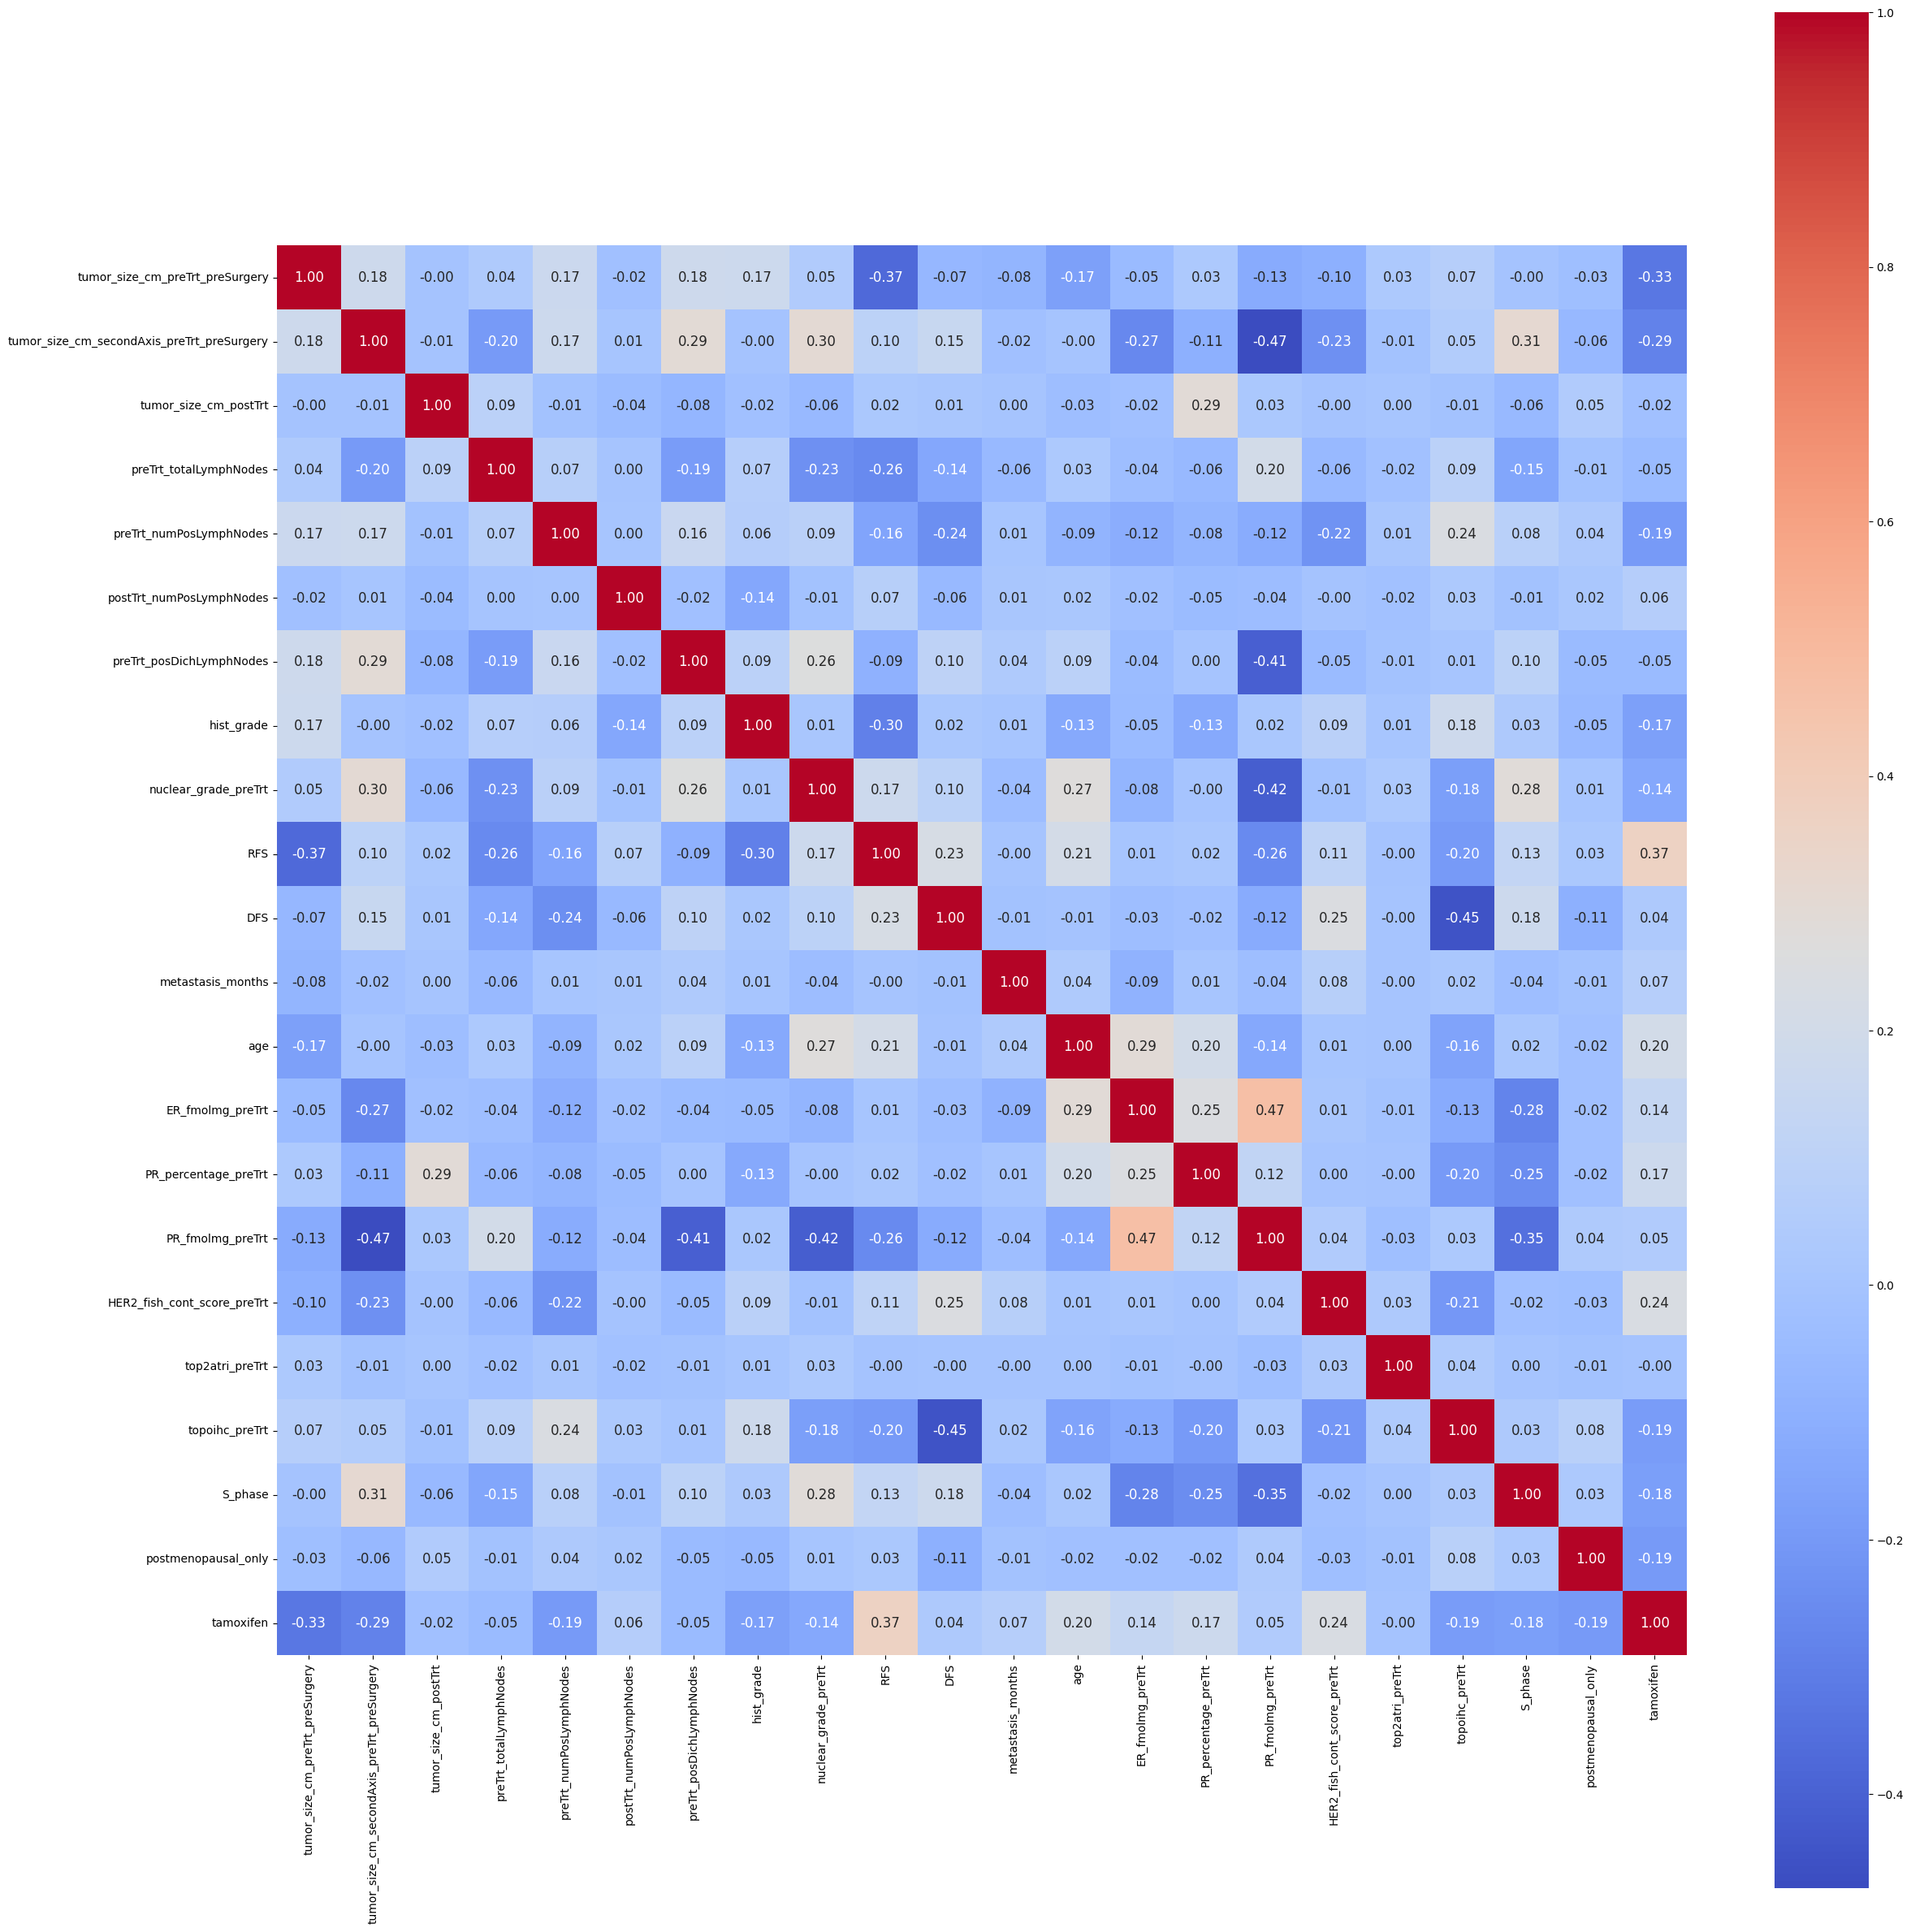

In [55]:
# OK # Select only numeric columns
# X_numeric = X.select_dtypes(include=[np.number])

# # Dropping columns with only one unique value
# X_numeric = X_numeric.loc[:, X_numeric.nunique() != 1]

# # Calculate correlation
# corr = X_numeric.corr()

# # Plot heatmap
# plt.figure(figsize=(28, 30))

# sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
#            xticklabels= X_numeric.columns, yticklabels= X_numeric.columns,
#            cmap= 'coolwarm')

# plt.show()


In [142]:
# Chi-square test of independence to check if there is a significant association between the variables. If the p-value is less than 0.05, you can conclude that the variables are associated.
# OK

# # Select categorical columns
# X_categorical = X.select_dtypes(include=['object'])

# # Calculate Chi-square test of independence
# p_values = {}
# for col1 in X_categorical.columns:
#     for col2 in X_categorical.columns:
#         contingency_table = pd.crosstab(X_categorical[col1], X_categorical[col2])
#         _, p, _, _ = chi2_contingency(contingency_table)
#         # print(f'p-value between {col1} and {col2}: {p}')
#         p_values[(col1, col2)] = p
        
# # Filter pairs with p-value < 0.05
# significant_pairs = {pair: p for pair, p in p_values.items() if p < 0.05}

# print(significant_pairs)



In [143]:

# OK# unique cat columns from significant pairs
# significant_columns = set()
# for pair in significant_pairs.keys():
#     significant_columns.add(pair[0])
#     significant_columns.add(pair[1])

# # Convert to list
# significant_columns = list(significant_columns)

# print(significant_columns)

Finding outliers in numerical columns using Tukey method

In [58]:

# def detect_outliers_tukey(data):
#     Q1 = np.percentile(data, 25)
#     Q3 = np.percentile(data, 75)
#     IQR = Q3 - Q1
#     outlier_step = 1.5 * IQR
#     outliers = data[(data < Q1 - outlier_step) | (data > Q3 + outlier_step)]
#     return outliers

# # Apply the function to the numerical columns of the DataFrame
# numerical_columns = df.select_dtypes(include=[np.number]).columns
# for col in numerical_columns:
#     print(f"Outliers for {col}:")
#     print(detect_outliers_tukey(df[col]))


def remove_outliers_tukey(df, multiplier=3.0):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = multiplier * IQR
        df = df[(df[col] >= Q1 - outlier_step) & (df[col] <= Q3 + outlier_step)]
    return df

# Remove outliers from features
# df = remove_outliers_tukey(df, multiplier=3.0)
X = remove_outliers_tukey(X, multiplier=3.0)

# removing rows from y
y = y[X.index]


df = pd.concat([X, y], axis=1)

df.head()

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,pam50,pCR_spectrum,RCB,menopausal_status,HER2_IHC_score_preTrt,ploidy,estrogen_receptor,surgery,therapy,OS
3813,Y,84,2.0,5.0,1.0,17,2,5,0,1,...,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo,1
3949,Y,84,2.0,5.0,1.0,14,0,7,0,2,...,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo,1
4000,Y,84,2.0,5.0,1.0,17,2,2,0,2,...,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo,1
4010,Y,84,2.0,5.0,1.0,17,2,4,0,2,...,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo,1
4406,Y,84,2.0,5.0,1.0,17,2,0,0,2,...,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo,1


In [144]:
df['OS'].value_counts()

OS
1    18493
0     8445
Name: count, dtype: int64

In [145]:
df['pCR'].value_counts()

pCR
0    26118
1      820
Name: count, dtype: int64

Is dataset balanced?

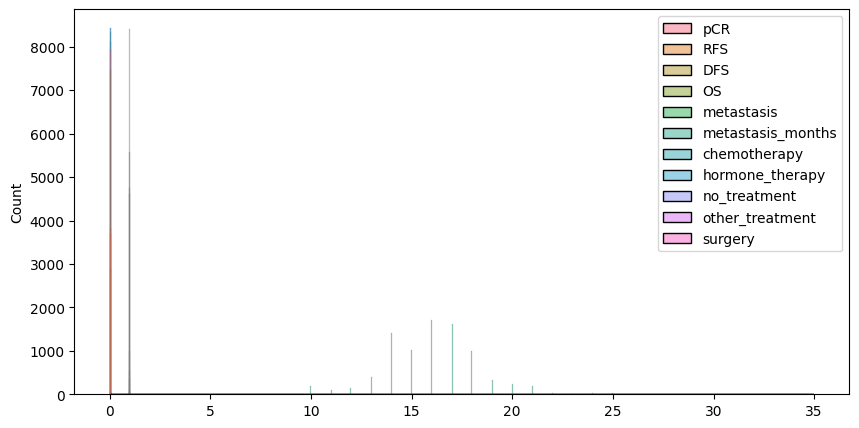

In [146]:
plt.figure(figsize=(10, 5))
sns.histplot(y, kde=False)
plt.show()

In [147]:
df.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       'nuclear_grade_preTrt', 'pCR', 'near_pCR', 'RFS', 'DFS', 'OS',
       'metastasis', 'metastasis_months', 'died_from_cancer_if_dead', 'age',
       'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt',
       'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt',
       'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt',
       'HER2_fish_cont_score_preTrt', 'cytokeratin5_pos', 'top2atri_preTrt',
       'topoihc_preTrt', 'S_phase', 'radiotherapy', 'postmenopausal_only',
       'anthracycline', 'taxane', 'anti_estrogen', 'aromatase_inhibitor',
       'anti_HER2', 'tamoxifen', 'doxorubicin', 'epirubicin', 'docetaxel',
       'capecitabine', 'fluorouracil', 'paclitaxel',

In [148]:
df['surgery'].value_counts()


surgery
1    26896
0       42
Name: count, dtype: int64

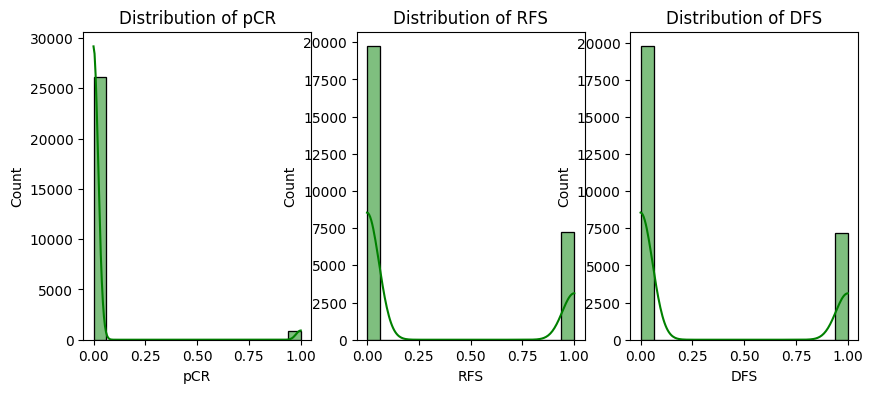

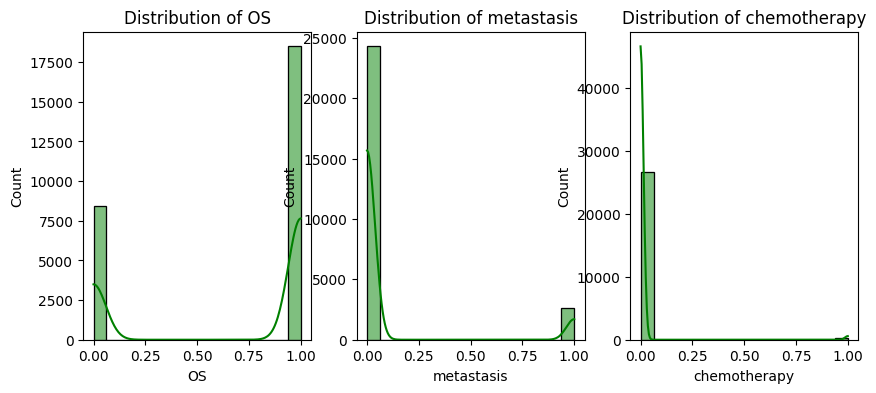

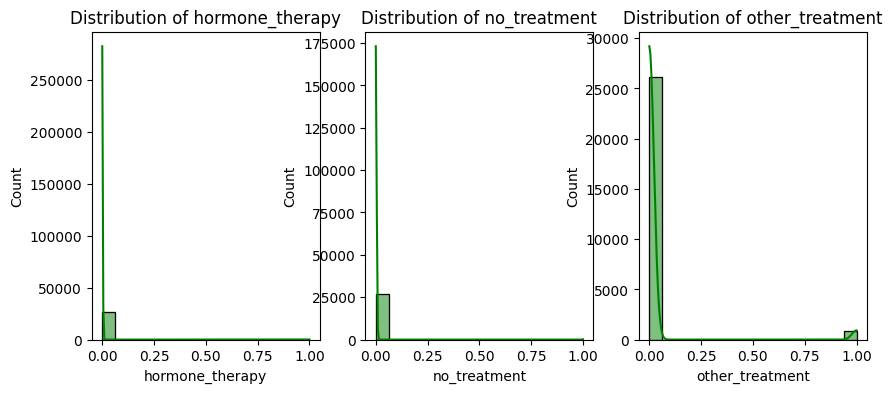

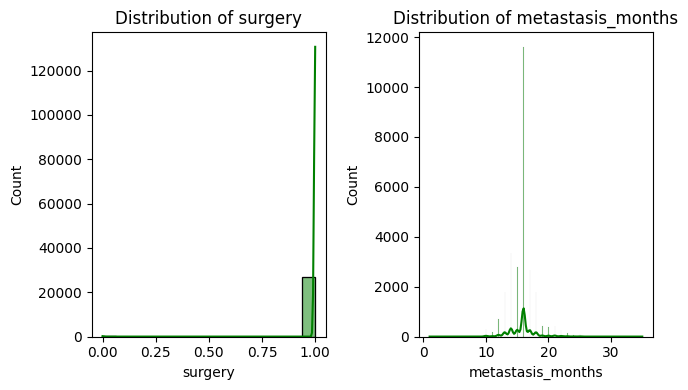

In [149]:
# checking features vs target variables pdt
['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'died_from_cancer_if_dead']
# checking features vs target variables ddt
['chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'surgery']

# Plot the distribution of the target variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['pCR'], kde=True, color='green')
plt.title('Distribution of pCR')

plt.subplot(1, 3, 2)
sns.histplot(df['RFS'], kde=True, color='green')
plt.title('Distribution of RFS')

plt.subplot(1, 3, 3)
sns.histplot(df['DFS'], kde=True, color='green')
plt.title('Distribution of DFS')

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['OS'], kde=True, color='green')
plt.title('Distribution of OS')

plt.subplot(1, 3, 2)
sns.histplot(df['metastasis'], kde=True, color='green')
plt.title('Distribution of metastasis')

plt.subplot(1, 3, 3)
sns.histplot(df['chemotherapy'], kde=True, color='green')
plt.title('Distribution of chemotherapy')

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['hormone_therapy'], kde=True, color='green')
plt.title('Distribution of hormone_therapy')

plt.subplot(1, 3, 2)
sns.histplot(df['no_treatment'], kde=True, color='green')
plt.title('Distribution of no_treatment')

plt.subplot(1, 3, 3)
sns.histplot(df['other_treatment'], kde=True, color='green')
plt.title('Distribution of other_treatment')


plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['surgery'], kde=True, color='green')
plt.title('Distribution of surgery')

plt.subplot(1, 3, 2)
sns.histplot(df['metastasis_months'], kde=True, color='green')
plt.title('Distribution of metastasis_months')


plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [150]:
# multi-target regression model

X = df.drop(['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'surgery'], axis=1) 

y = df[['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'surgery']]

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# multi-target regression model (ElasticNet)
multioutput_model = MultiOutputRegressor(
    ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=5)
multioutput_model.fit(X_train, y_train)

# Create and train the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Create and train the random forest regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [151]:
# Make predictions
multioutput_pred = multioutput_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)
 
# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_test, multioutput_pred)
multioutput_mae = mean_absolute_error(y_test, multioutput_pred)
 
# Calculate performance metrics for decision tree model
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)

# Calculate performance metrics for random forest model
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)
print("Decision Tree Model - Mean Squared Error:", tree_mse)
print("Decision Tree Model - Mean Absolute Error:", tree_mae)
print("Random Forest Model - Mean Squared Error:", forest_mse)
print("Random Forest Model - Mean Absolute Error:", forest_mae)

Multioutput Model - Mean Squared Error: 0.3986590029139309
Multioutput Model - Mean Absolute Error: 0.23561067350592121
Decision Tree Model - Mean Squared Error: 0.4292873051224944
Decision Tree Model - Mean Absolute Error: 0.120452858203415
Random Forest Model - Mean Squared Error: 0.2014634879909898
Random Forest Model - Mean Absolute Error: 0.09807649152999956


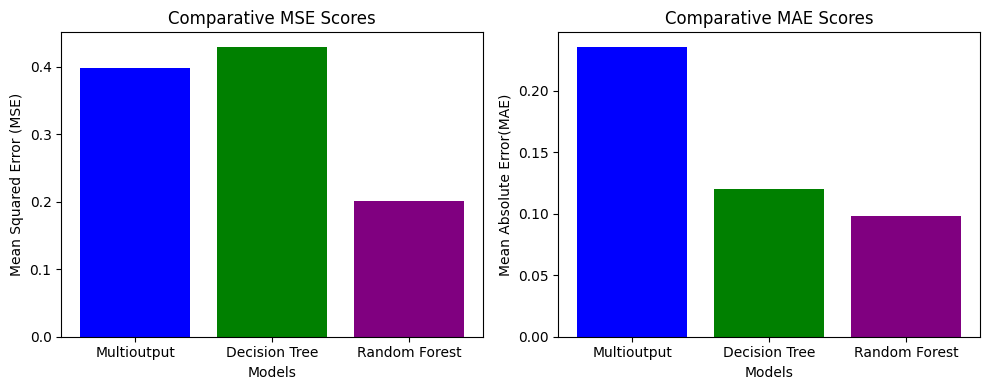

In [152]:
# Create a comparative visualization
plt.figure(figsize=(10, 4))
models = ['Multioutput', 'Decision Tree', 'Random Forest']
mse_scores = [multioutput_mse, tree_mse, forest_mse]
mae_scores = [multioutput_mae, tree_mae, forest_mae]
 
# Plot Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparative MSE Scores')

# Plot R-squared Score (R2)
plt.subplot(1, 2, 2)
plt.bar(models, mae_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error(MAE)')
plt.title('Comparative MAE Scores')

plt.tight_layout()
plt.show()

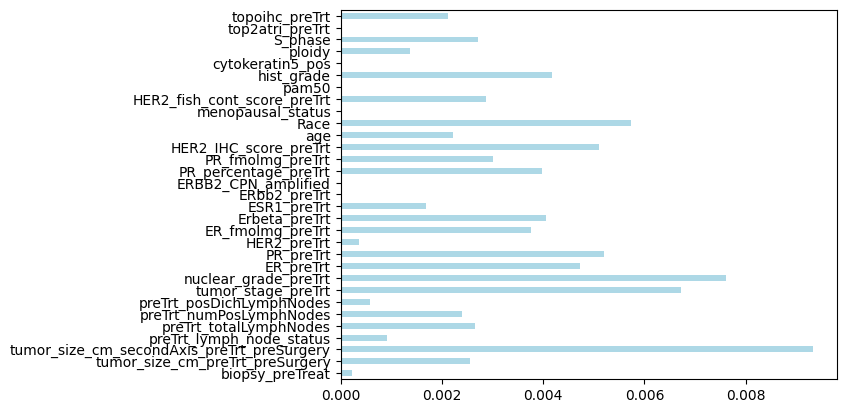

In [156]:
#FEATURE IMP BASED ON TREATMENTS
from sklearn.feature_selection import mutual_info_classif

X1 = df[['biopsy_preTreat', 
      'tumor_size_cm_preTrt_preSurgery', 'tumor_size_cm_secondAxis_preTrt_preSurgery', 
      'preTrt_lymph_node_status', 'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'tumor_stage_preTrt', 'nuclear_grade_preTrt', 'ER_preTrt', 'PR_preTrt', 'HER2_preTrt', 'ER_fmolmg_preTrt', 'Erbeta_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt',  'ERBB2_CPN_amplified', 'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_IHC_score_preTrt',
      'age', 'Race', 'menopausal_status', 'HER2_fish_cont_score_preTrt',
      'pam50', 'hist_grade', 'cytokeratin5_pos', 'ploidy', 'S_phase', 'top2atri_preTrt', 'topoihc_preTrt']]

y1 = df[['surgery']]

importances = mutual_info_classif(X1, y1['surgery'])
feature_importances = pd.Series(importances, X1.columns)
feature_importances.plot(kind='barh', color='lightblue')
plt.show()

In [158]:
# #chi2
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest

# chi2_features = SelectKBest(chi2, k=10)
# X_kbest = chi2_features.fit_transform(X1, y1)

# # Get the selected feature names
# print('orig features:', X1.shape[1])
# print('selected features:', X_kbest.shape[1])

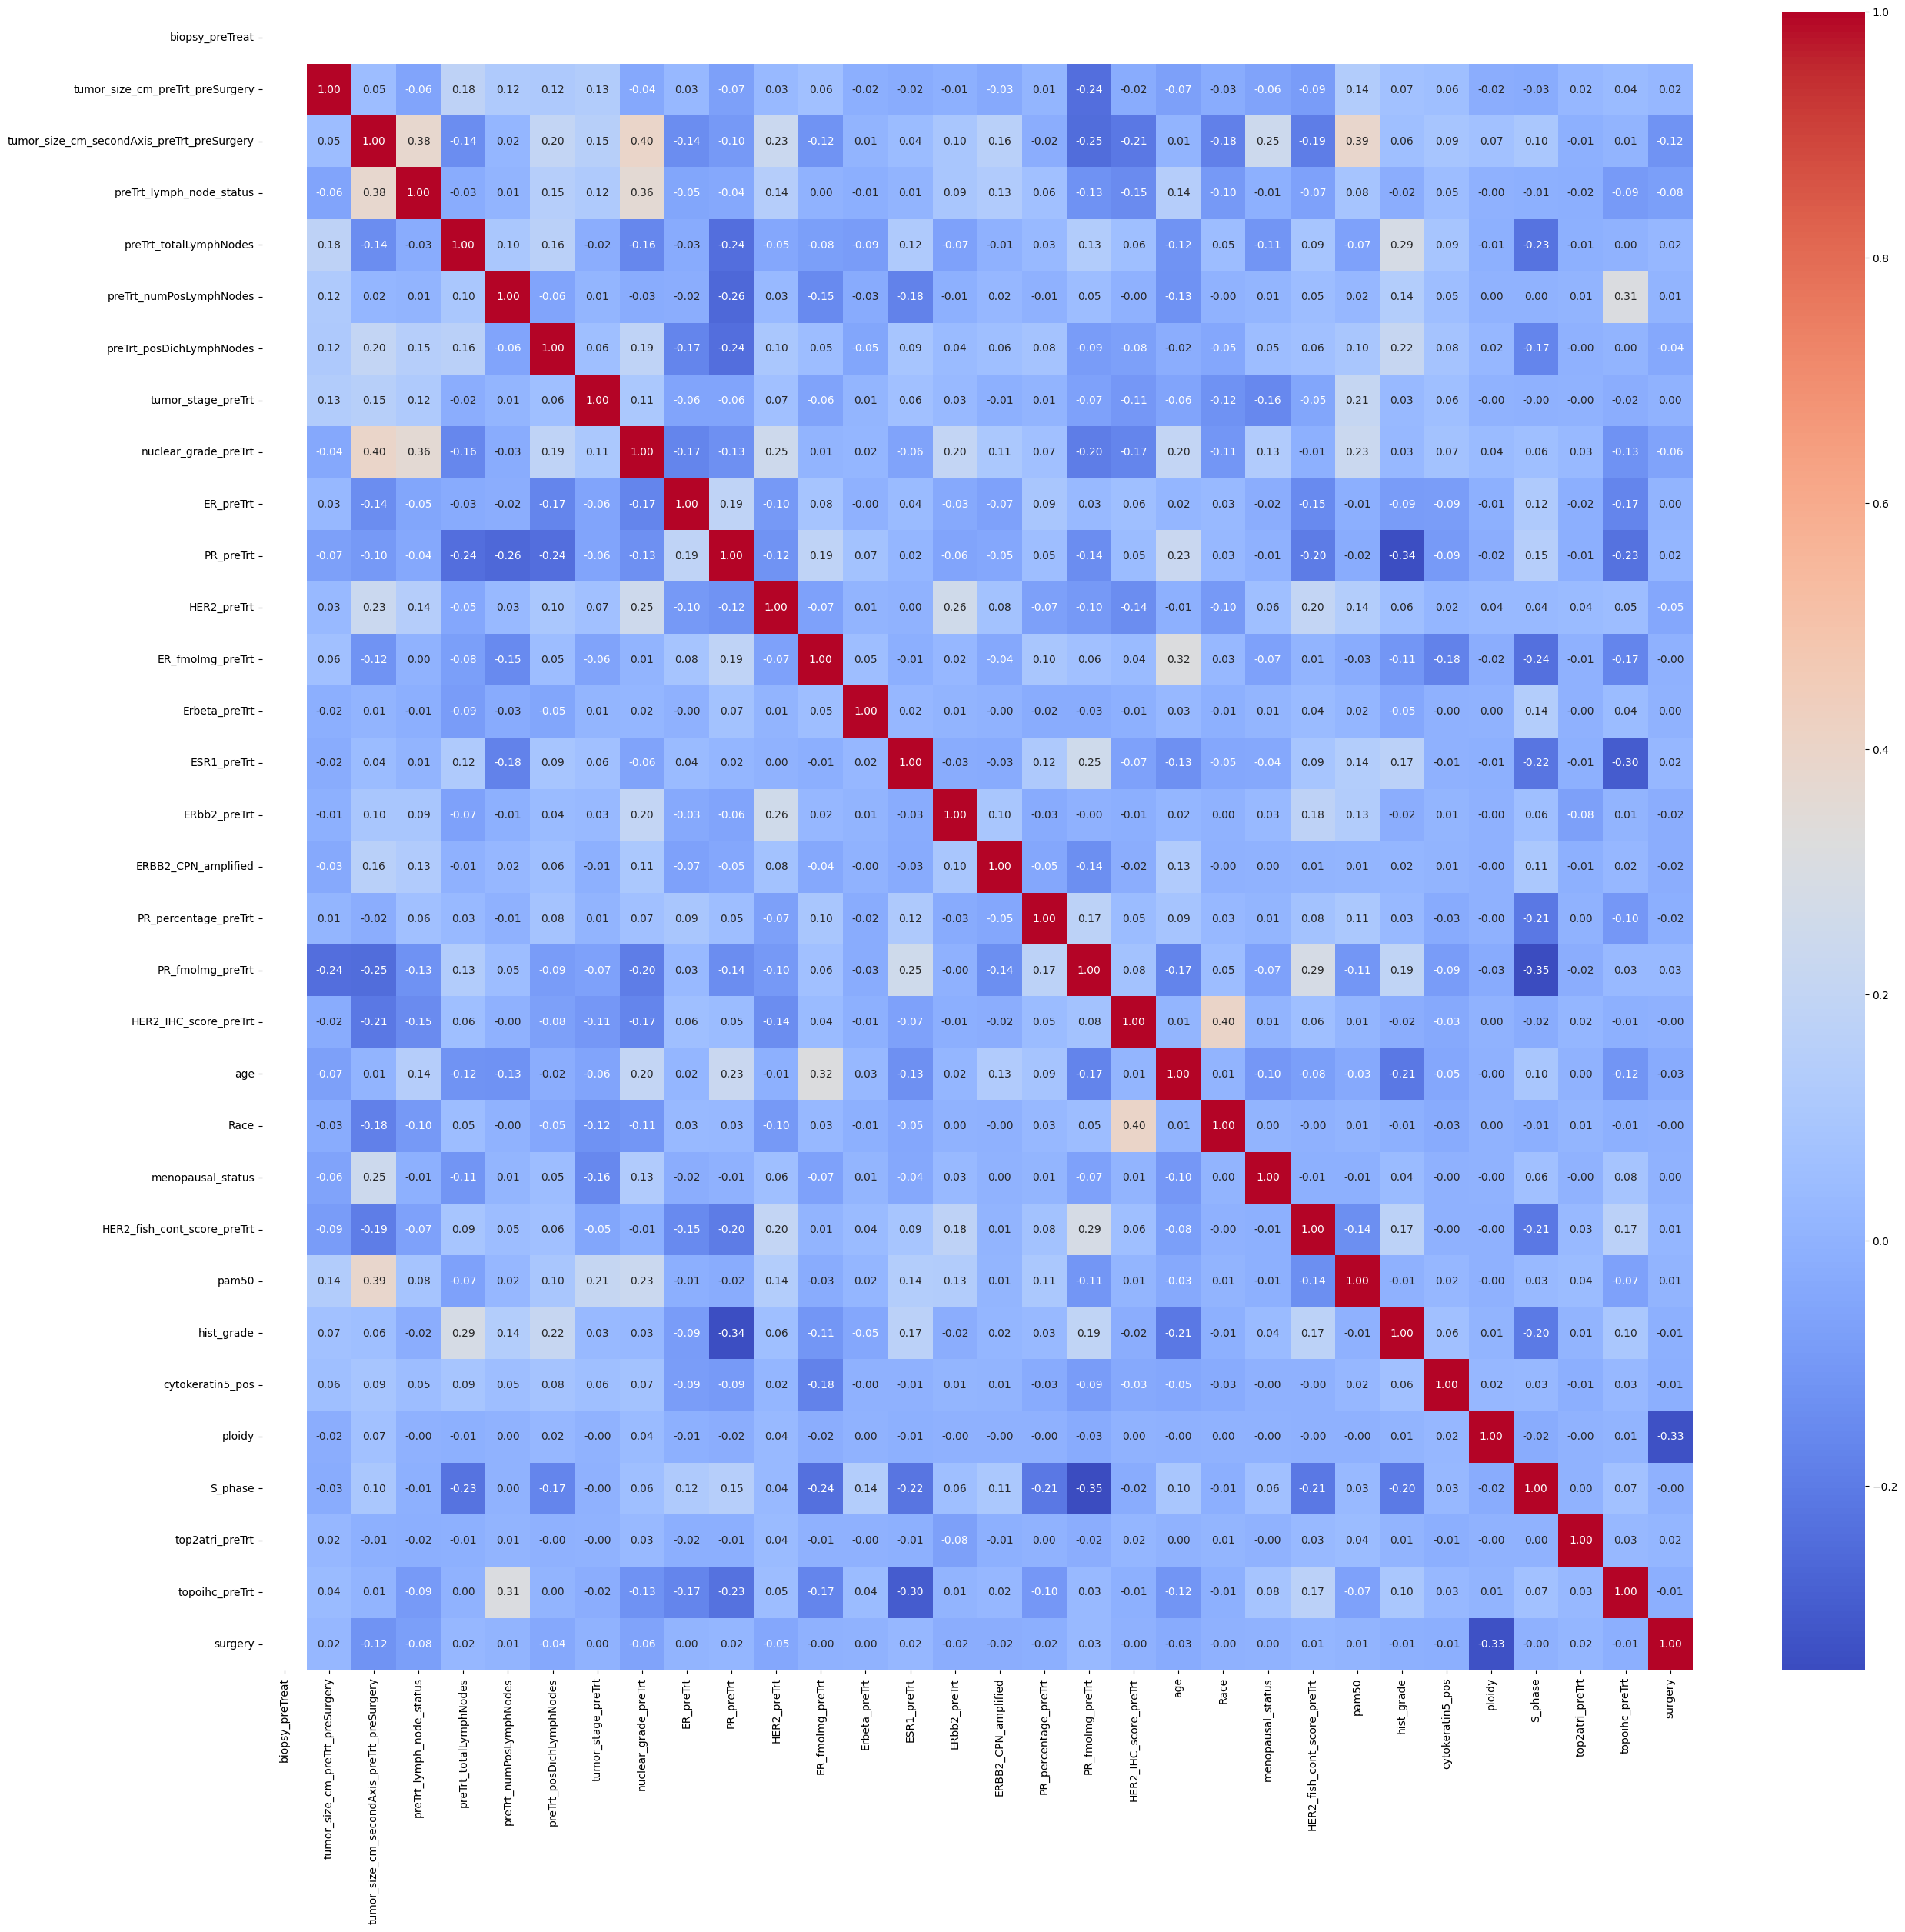

In [163]:
# from skfeature.function.similarity_based import fisher_score

# ranks = fisher_score.fisher_score(X1, y1)


# feature_importances = pd.Series(ranks, X1.columns)
# feature_importances.plot(kind='barh', color='lightblue')
# plt.show()

df_cor = pd.concat([X1, y1], axis=1)

# Calculate correlations
corr = df_cor.corr()

# Plot heatmap
plt.figure(figsize=(30, 28))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [165]:
#variance
from sklearn.feature_selection import VarianceThreshold

threshold = VarianceThreshold(threshold=0)
threshold.fit(X1)
threshold.get_support()

#finds the columns with zero variance - same value in all samples that seems to be 'biopsy_preTreat'

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

/Users/tasha/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: xlabel='Features'>

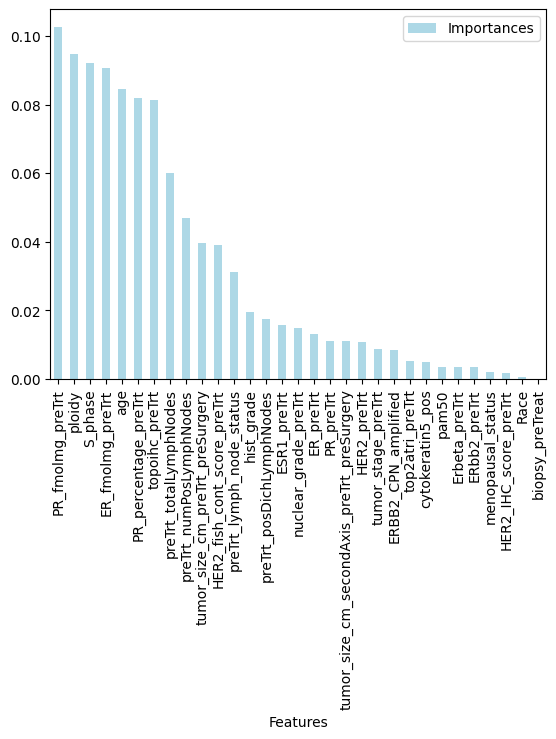

In [170]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X1, y1)
importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X1).columns, "Importances": importances})
# final_df.set_index('Importances')
final_df.set_index('Features', inplace=True)

final_df = final_df.sort_values("Importances", ascending=False)

final_df.plot.bar(color='lightblue')

In [171]:
print(final_df)

                                            Importances
Features                                               
PR_fmolmg_preTrt                               0.102698
ploidy                                         0.094688
S_phase                                        0.092218
ER_fmolmg_preTrt                               0.090762
age                                            0.084451
PR_percentage_preTrt                           0.081874
topoihc_preTrt                                 0.081389
preTrt_totalLymphNodes                         0.059965
preTrt_numPosLymphNodes                        0.046931
tumor_size_cm_preTrt_preSurgery                0.039701
HER2_fish_cont_score_preTrt                    0.038917
preTrt_lymph_node_status                       0.031072
hist_grade                                     0.019440
preTrt_posDichLymphNodes                       0.017533
ESR1_preTrt                                    0.015773
nuclear_grade_preTrt                           0

In [167]:
df['biopsy_preTreat'].value_counts()

biopsy_preTreat
0    26938
Name: count, dtype: int64

using pca?

In [14]:
dfcopy = pd.read_csv('dataset.csv')

nan_counts = dfcopy.isna().sum()
print(nan_counts)

biopsy_preTreat                               0
pCR_postTrt_days                              0
tumor_size_cm_preTrt_preSurgery               0
tumor_size_cm_secondAxis_preTrt_preSurgery    0
tumor_size_cm_postTrt                         0
                                             ..
HER2_IHC_score_preTrt                         0
ploidy                                        0
estrogen_receptor                             0
surgery                                       0
therapy                                       0
Length: 90, dtype: int64


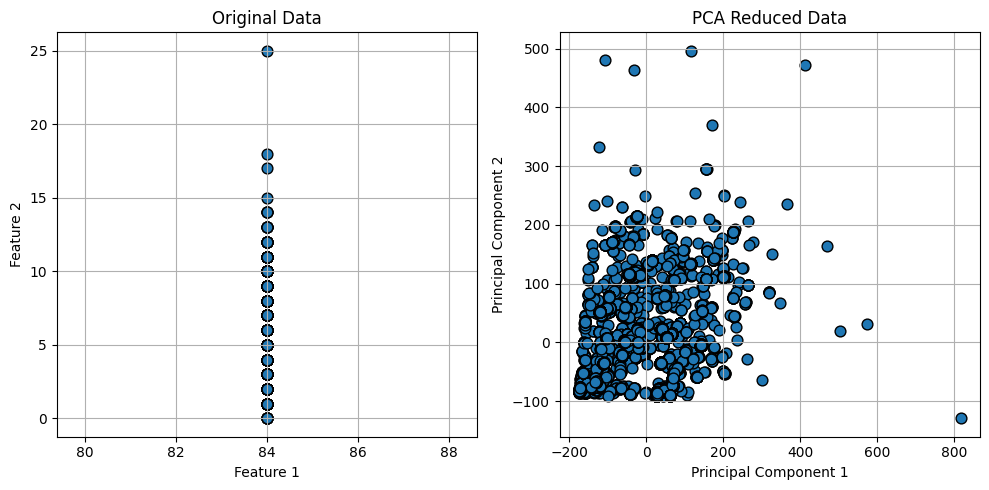

Explained Variance Ratio: [0.60451585 0.35294152]
The first 2 components explain 90% of the variance.


In [31]:
from sklearn.decomposition import PCA

# dfcopy = pd.read_csv('dataset.csv')

X = dfcopy.drop(['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'surgery', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'died_from_cancer_if_dead'],  axis=1)
y = dfcopy[['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'surgery', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'died_from_cancer_if_dead']]

X_encoded = pd.get_dummies(X)


# for col in X.columns:
#     X[col] = pd.to_numeric(X[col], errors='coerce')

# Apply PCA for noise reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Plot the original data and the PCA-reduced data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], edgecolor='k', s=60)

plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(1, 2, 2)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=60)

plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 90% of the variance
n_components = np.where(cumulative_explained_variance >= 0.9)[0][0] + 1

print(f"The first {n_components} components explain 90% of the variance.")

# Keep only the first n_components
X_pca_reduced = X_pca[:, :n_components]

In [32]:
# Get the loadings
loadings = pca.components_

# Get loadings of the first and second component
first_component_loadings = loadings[0]
second_component_loadings = loadings[1]


# Sort the indices of the variables for the first component
sorted_indices_first = np.argsort(np.abs(first_component_loadings))[::-1]

# Sort the indices of the variables for the second component
sorted_indices_second = np.argsort(np.abs(second_component_loadings))[::-1]

# Get the variable names sorted by their contribution to the first component
sorted_variable_names_first = X_encoded.columns[sorted_indices_first]

# Get the variable names sorted by their contribution to the second component
sorted_variable_names_second = X_encoded.columns[sorted_indices_second]

# Print the sorted variable names for the first component
print("Variables sorted by their contribution to the first principal component:")
for var in sorted_variable_names_first:
    print(var)

# Print the sorted variable names for the second component
print("\nVariables sorted by their contribution to the second principal component:")
for var in sorted_variable_names_second:
    print(var)

Variables sorted by their contribution to the first principal component:
PR_fmolmg_preTrt
ER_fmolmg_preTrt
PR_percentage_preTrt
age
S_phase
tumor_size_cm_preTrt_preSurgery
preTrt_totalLymphNodes
HER2_fish_cont_score_preTrt
metastasis_months_2
topoihc_preTrt
anti_estrogen_N
anti_estrogen_Y
ESR1_preTrt_N
ESR1_preTrt_Y
tamoxifen
RFS_2
RFS_1
DFS_1
postTrt_numPosLymphNodes
hist_grade
RFS_3
DFS_3
DFS_2
preTrt_numPosLymphNodes
tumor_size_cm_secondAxis_preTrt_preSurgery
docetaxel_N
docetaxel_Y
epirubicin_Y
epirubicin_N
taxane_N
taxane_Y
PR_preTrt_N
PR_preTrt_Y
radiotherapy_Y
radiotherapy_N
metastasis_months_1
anthracycline_N
anthracycline_Y
treatment_admin_oral
nuclear_grade_preTrt
capecitabine_Y
capecitabine_N
treatment_admin_NOS
preTrt_lymph_node_status_N0
therapy_neo
cyclophosphamide_N
cyclophosphamide_Y
preTrt_posDichLymphNodes
fluorouracil_Y
fluorouracil_N
tumor_stage_preTrt_T2
near_pCR_Y
near_pCR_N
preTrt_lymph_node_status_N1
paclitaxel_N
paclitaxel_Y
clinical_AJCC_stage_IIB
pam50_Basal


In [33]:
# Decide how many top contributing variables you want to keep
n_top_variables = 10

# Get the names of the top contributing variables for the first and second component
top_variables_first = sorted_variable_names_first[:n_top_variables]
top_variables_second = sorted_variable_names_second[:n_top_variables]

# Combine the two lists of top variables
top_variables = list(set(top_variables_first).union(set(top_variables_second)))

# Create a new DataFrame with only the top variables
df_reduced = X_encoded[top_variables]

df_reduced.head()

,PR_percentage_preTrt,HER2_fish_cont_score_preTrt,preTrt_numPosLymphNodes,age,topoihc_preTrt,PR_fmolmg_preTrt,S_phase,metastasis_months_2,ER_fmolmg_preTrt,tumor_size_cm_preTrt_preSurgery,preTrt_totalLymphNodes
0,55,1,3,46,30,133,10,16.0,13,3.0,12
1,0,5,0,56,18,2,12,16.0,1,3.0,15
2,1,1,2,67,14,5,9,16.0,34,3.0,17
3,39,4,7,56,26,95,11,16.0,110,2.0,14
4,40,1,2,40,13,138,6,16.0,95,2.0,7


In [34]:
df_reduced.columns

Index(['PR_percentage_preTrt', 'HER2_fish_cont_score_preTrt',
       'preTrt_numPosLymphNodes', 'age', 'topoihc_preTrt', 'PR_fmolmg_preTrt',
       'S_phase', 'metastasis_months_2', 'ER_fmolmg_preTrt',
       'tumor_size_cm_preTrt_preSurgery', 'preTrt_totalLymphNodes'],
      dtype='object')

In [42]:
# Perform PCA
pca = PCA(n_components=7)  # Increase the number of components
X_pca = pca.fit_transform(X_encoded)

# Get the loadings
loadings = pca.components_

# Set a threshold for the loadings
threshold = 0.5  # Lower the threshold

# Find the indices of the features that have a loading above the threshold on any of the first five components
important_features_indices = np.where((np.abs(loadings[0]) > threshold) | (np.abs(loadings[1]) > threshold) | (np.abs(loadings[2]) > threshold) | (np.abs(loadings[3]) > threshold) | (np.abs(loadings[4]) > threshold) | (np.abs(loadings[5]) > threshold) | (np.abs(loadings[6]) > threshold))

# Get the names of the important features
important_features = X_encoded.columns[important_features_indices]

# Create a new dataset with only the important features
df_reduced = X_encoded[important_features]

df_reduced.columns

Index(['preTrt_totalLymphNodes', 'postTrt_numPosLymphNodes', 'age',
       'ER_fmolmg_preTrt', 'PR_percentage_preTrt', 'PR_fmolmg_preTrt',
       'topoihc_preTrt'],
      dtype='object')

In [46]:
# trying another method

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


dfcopy = pd.read_csv('dataset.csv')


# Assuming df is your DataFrame and 'hpv_status' is the column for human papillomavirus status
# df['hpv_status'].fillna(0, inplace=True)

# Handle missing values
# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column].fillna(df[column].mode()[0], inplace=True)
#     else:
#         df[column].fillna(df[column].median(), inplace=True)

# Convert ordinal covariates to numerical
# ordinal_columns = ['pathological_grade', 'T_category', 'N_category', 'AJCC_staging', 'prescribed_chemotherapy']
# for column in ordinal_columns:
#     df[column] = df[column].astype('category').cat.codes


features = dfcopy.drop(['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'surgery', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'died_from_cancer_if_dead'],  axis=1)
target = dfcopy[['pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months', 'surgery', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'other_treatment', 'died_from_cancer_if_dead']]



# One-hot encoding for categorical variables
categorical_columns = features.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(features[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
features = pd.concat([features.drop(categorical_columns, axis=1), one_hot_encoded_df], axis=1)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


# Rescale features to the (-1, +1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create a DataFrame of the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features.columns)
print("PCA loadings:")
print(loadings)

# Convert transformed features to DataFrame
X_train_df = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])

# Return the DataFrames
X_train_df.head(), X_test_df.head(), y_train.head(), y_test.head()

/Users/tasha/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


PCA loadings:
                                                     PC1           PC2  \
pCR_postTrt_days                            6.803354e-17 -1.233244e-16   
tumor_size_cm_preTrt_preSurgery            -9.910995e-03 -1.374230e-03   
tumor_size_cm_secondAxis_preTrt_preSurgery  1.336876e-02 -2.842222e-03   
tumor_size_cm_postTrt                      -4.051521e-03 -5.645251e-03   
preTrt_totalLymphNodes                      6.530150e-03 -7.772114e-04   
...                                                  ...           ...   
estrogen_receptor_block_and_eliminate      -3.779183e-04  6.600186e-05   
estrogen_receptor_block_and_stop           -9.622707e-03  2.398420e-02   
therapy_mixed                               1.030333e-02 -1.298385e-03   
therapy_neo                                -1.471081e-02 -4.983828e-02   
therapy_unspecified                         4.316724e-03  2.222950e-03   

                                                     PC3           PC4  \
pCR_postTrt_days       

(        PC1       PC2       PC3       PC4       PC5       PC6
 0 -0.985524  1.306523  0.662935  3.842272 -0.286285 -1.740256
 1  2.611024 -1.815907  3.657507 -1.624474  0.167864 -1.349904
 2 -1.710356 -0.794449 -0.394737 -0.707417 -0.028801  0.178950
 3 -1.710356 -0.794449 -0.394737 -0.707417 -0.028801  0.178950
 4 -1.023559  1.300617 -1.220971 -0.259942 -0.176201 -1.470911,
         PC1       PC2       PC3       PC4       PC5       PC6
 0  1.908589 -1.735319 -1.190094  0.441786  2.055993  0.687089
 1  0.699126  2.720002 -0.115039 -0.235264  0.234793 -0.203966
 2 -1.671189 -0.908808  0.909746 -0.082296 -0.882826  1.133000
 3 -1.580382 -0.651241 -0.111885  0.794966  0.277152  0.393664
 4  1.856359 -3.422419 -1.440645 -0.378523  0.428108 -1.238602,
       pCR  RFS  DFS  OS metastasis  metastasis_months     surgery  \
 22006   N    0    0   0          Y                 13  preserving   
 23590   N    1    0   1          N                 14  preserving   
 6424    N    0    0   1        

Feature scaling

In [61]:
# def scaler(df):
#     scaler = preprocessing.MinMaxScaler()
#     scaled_df = scaler.fit_transform(df)
#     scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
#     return scaled_df

# # testing scaler
# scaled_df = scaler(X)

# scaled_df.head()

Feature engineering & selection

In [62]:
#the higher the score more important or relevant is the feature towards the target variable.



# Dummy data
X = pd.get_dummies(X)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE instance
smote = SMOTE(random_state=0, k_neighbors=2)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())



rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

#  feature importances
importances = rf.feature_importances_

# Print feature importances
# for feature, importance in zip(X.columns, importances):
#     print(f'Feature: {feature}, Importance: {importance}')

# Map feature importances to their corresponding feature names
feature_importances = dict(zip(X.columns, importances))

# threshold for feature importance
threshold = 0.05  

# list of important features
important_features = [feature for feature, importance in feature_importances.items() if importance >= threshold]

print(important_features)    




OS
1    807
0    807
Name: count, dtype: int64
['tumor_size_cm_preTrt_preSurgery', 'preTrt_totalLymphNodes', 'metastasis_months', 'age', 'topoihc_preTrt']


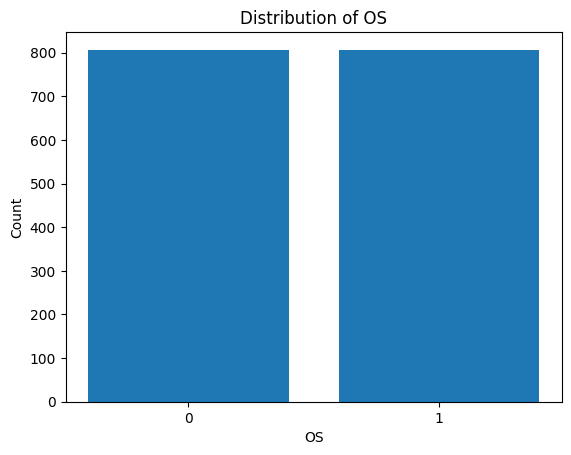

In [63]:

# counts of each class
class_counts = y_train_resampled.value_counts()

# bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('OS')
plt.ylabel('Count')
plt.title('Distribution of OS')
plt.xticks([0, 1])
plt.show()

In [66]:
#Feature selection for the patient dt

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define your target variables
target_variables = ['pCR', 'RFS', 'DFS', 'OS']

# Iterate over each target variable
for target_variable in target_variables:
    print(f"Target Variable: {target_variable}")

    # Define the appropriate model for the target variable
    if target_variable in ['pCR', 'RFS', 'DFS']:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif target_variable == 'OS':
        model = CoxPHFitter()

    print("Shape of X_train:", X_train.shape)
    print("Shape of target variable:", df[target_variable].shape)

    # Create RFE object and fit it with the model
    selector = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    selector = selector.fit(X_train, df[target_variable])

    # Print the selected features
    selected_features = X_train.columns[selector.support_]
    print("Selected Features:")
    print(selected_features)

    print("\n")


Target Variable: pCR
Shape of X_train: (815, 81)
Shape of target variable: (1019,)


ValueError: Found input variables with inconsistent numbers of samples: [815, 1019]

In [ ]:
# from scipy.stats import chi2_contingency
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of features
# features = ['preTrt_totalLymphNodes', 'RFS', 'DFS', 'PR_fmolmg_preTrt', 'ESR1_preTrt_N', 'ESR1_preTrt_Y']

# for feature in features:
#     # Chi-square test
#     contingency_table = pd.crosstab(df[feature], df['OS'])
#     chi2, p_val, _, _ = chi2_contingency(contingency_table)

#     print(f'Feature: {feature}')
#     print(f'Chi-square statistic: {chi2}')
#     print(f'p-value: {p_val}')
    
#     # Bar plot
#     plt.figure(figsize=(10, 5))  # Set figure size
#     sns.countplot(x=feature, hue='OS', data=df)
#     plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Assuming that 'target' is the name of your target variable
# # X = X_numeric.drop('OS', axis=1)
# # y = X_numeric['OS']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a random forest regressor
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the model
# rf.fit(X_train, y_train)

# # Get feature importances
# importances = rf.feature_importances_

# # Print feature importances
# for feature, importance in zip(X.columns, importances):
#     print(f'Feature: {feature}, Importance: {importance}')

Feature Scaling
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.[1]



In [ ]:
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,nuclear_grade_preTrt,...,tumor_stage_preTrt_T2,pam50_Basal,pCR_spectrum_PR,RCB_II,menopausal_status_post,HER2_IHC_score_preTrt_NEG,ploidy_aneuploid,estrogen_receptor_NOS,surgery_preserving,therapy_neo
0,0.0,0.0,0.0,0.0,1.000000,0.666667,0.416667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.571429,0.000000,0.583333,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.000000,0.666667,0.166667,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.000000,0.666667,0.333333,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.000000,0.666667,0.000000,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Features Distribution


In [ ]:
#model?

# Split the data into training and test sets for each target
X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X, y_OS, test_size=0.2, random_state=42)
X_train_died, X_test_died, y_train_died, y_test_died = train_test_split(X, y_died, test_size=0.2, random_state=42)

# Create a random forest classifier for each target
rf_OS = RandomForestClassifier(n_estimators=100, random_state=42)
rf_died = RandomForestClassifier(n_estimators=100, random_state=42)

# Train each model
rf_OS.fit(X_train_OS, y_train_OS)
rf_died.fit(X_train_died, y_train_died)

NameError: name 'y_OS' is not defined